In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from basic_functions import data_load, delete_na

In [2]:
df = data_load("data/df_labels.csv")


Data loaded!


In [3]:
df.head()

,federal_state,gender,citizenship,marital_status,employment_status,employment_sector,job,employment_position,livelihood,income,educational_qualification,highest_qualification,primary_residence,Household relationship
0,1,male,german,divorced,econ. inactive,NaN,NaN,NaN,pension,5.0,1.0,33.0,1.0,1.0
1,1,male,german,married,employed,41.0,712.0,6.0,income,9.0,1.0,33.0,1.0,1.0
2,1,male,german,married,employed,41.0,712.0,6.0,income,9.0,1.0,33.0,1.0,1.0
3,1,male,german,married,employed,41.0,712.0,6.0,income,9.0,1.0,33.0,1.0,1.0
4,1,male,german,married,employed,41.0,712.0,6.0,income,9.0,1.0,33.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23374 entries, 0 to 23373
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   federal_state              23374 non-null  int64  
 1   gender                     23107 non-null  object 
 2   citizenship                23107 non-null  object 
 3   marital_status             23107 non-null  object 
 4   employment_status          23107 non-null  object 
 5   employment_sector          15655 non-null  float64
 6   job                        15651 non-null  float64
 7   employment_position        15655 non-null  float64
 8   livelihood                 23107 non-null  object 
 9   income                     23107 non-null  float64
 10  educational_qualification  23107 non-null  float64
 11  highest_qualification      23079 non-null  float64
 12  primary_residence          23107 non-null  float64
 13  Household relationship     23107 non-null  flo

In [5]:
print(df["federal_state"].isna().sum())

0


In [6]:
df = df.dropna(subset=["gender"])

In [7]:
print(df.isna().sum())

federal_state                   0
gender                          0
citizenship                     0
marital_status                  0
employment_status               0
employment_sector            7452
job                          7456
employment_position          7452
livelihood                      0
income                          0
educational_qualification       0
highest_qualification          28
primary_residence               0
Household relationship          0
dtype: int64


In [8]:
#Splitting data by employment status
mask_no_occupation = df["job"].isnull()

df_no_occupation = df[mask_no_occupation].copy()
df_occupation = df[~mask_no_occupation].copy()

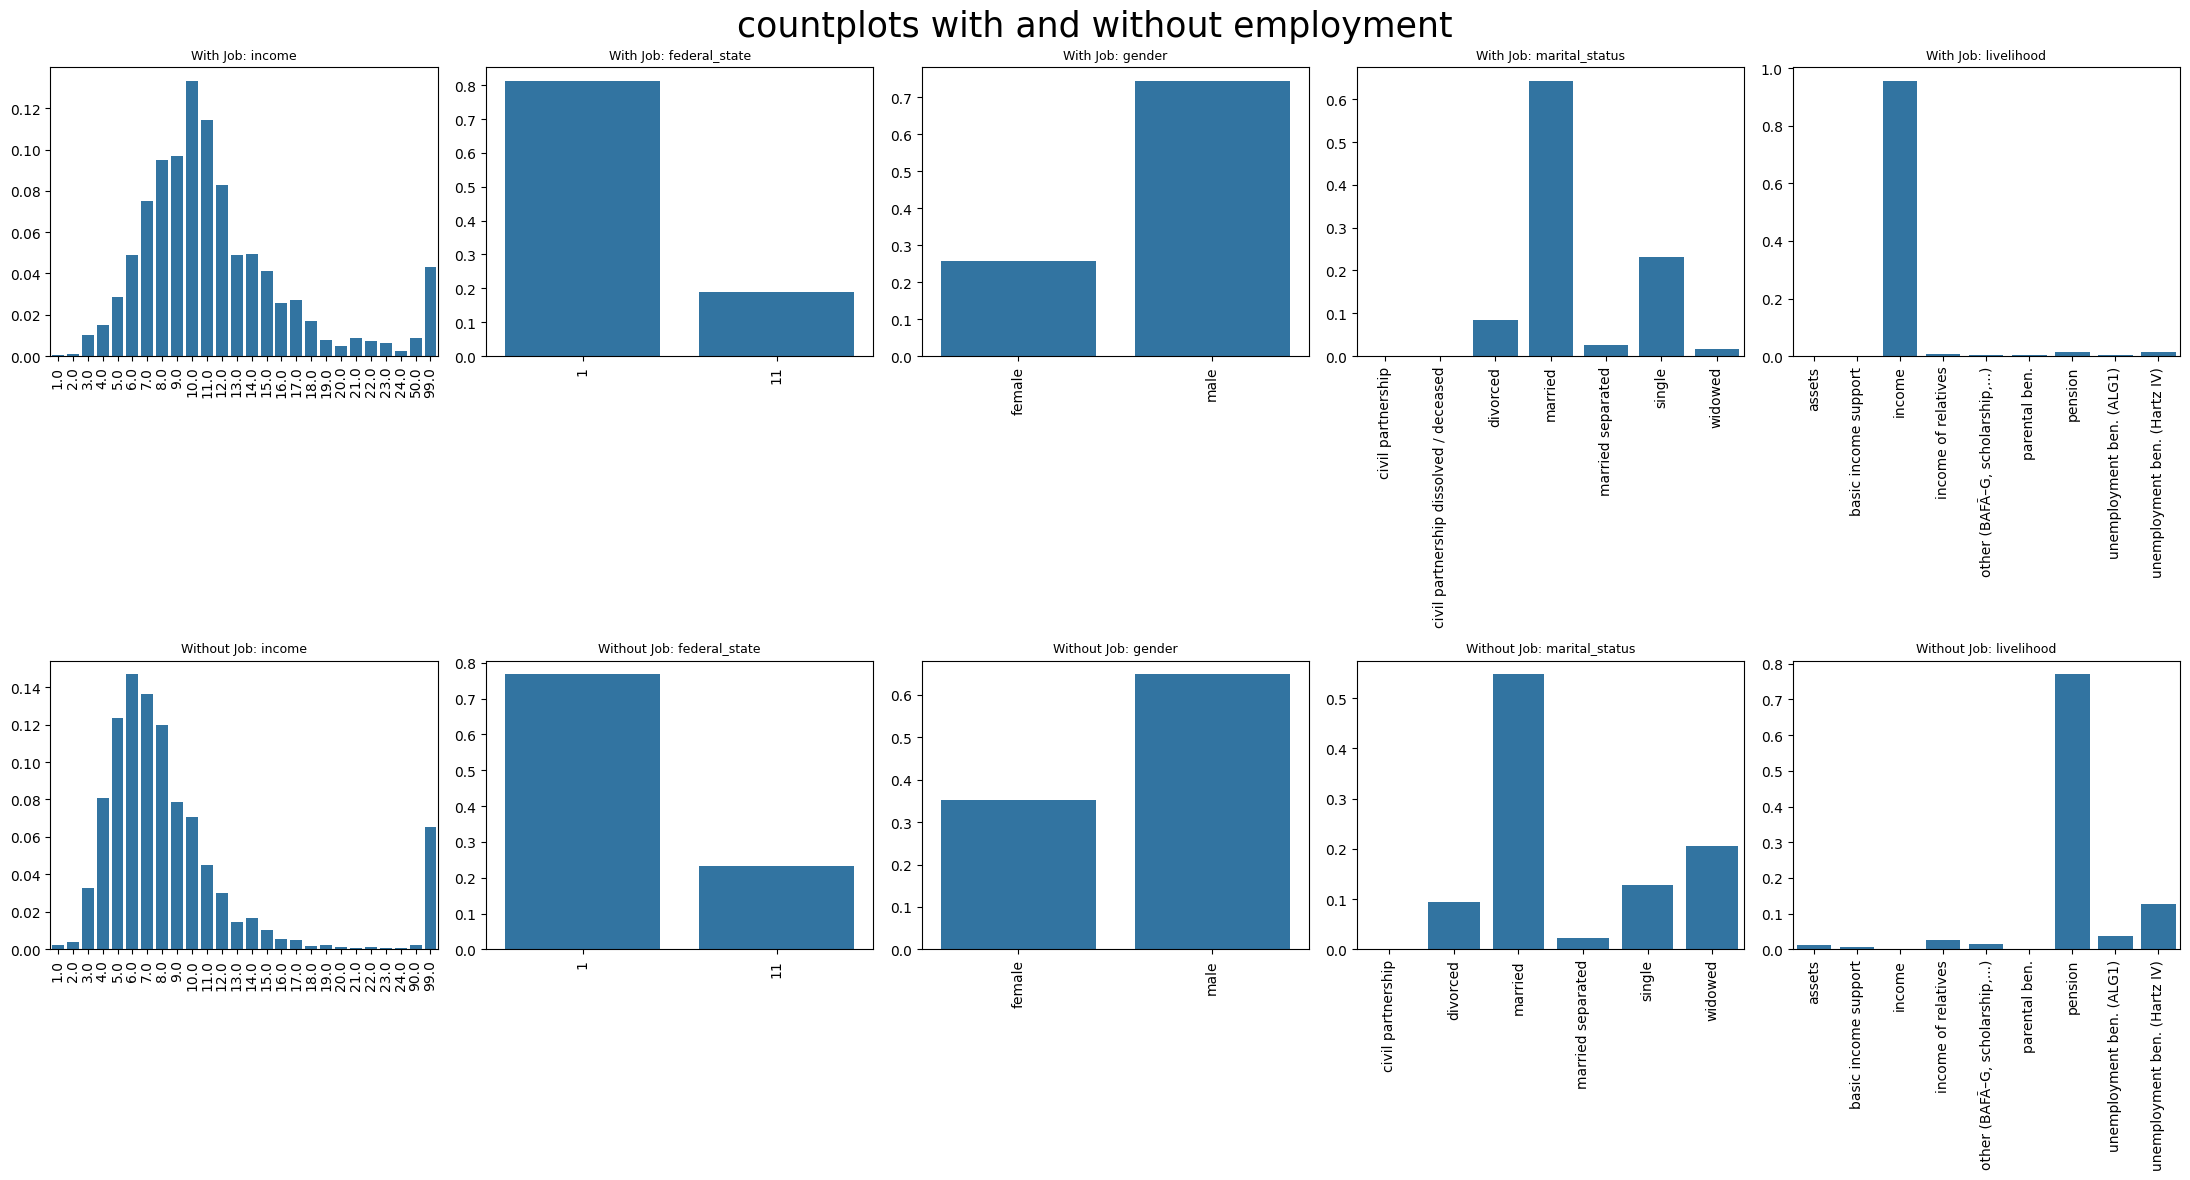

In [14]:
#Countplots for all people

groups = {
    "With Job": df_occupation,
    "Without Job": df_no_occupation
}

columns = ["income", "federal_state",  "gender", "marital_status", "livelihood"]

fig, axes = plt.subplots(len(groups), len(columns), figsize=(22, 12))

for row, (group_name, data) in enumerate(groups.items()):
    for col_index, col in enumerate(columns):
        ax = axes[row, col_index]
        sns.countplot(data=data, x=col, ax=ax, order=sorted(data[col].dropna().unique()), stat="probability")
        ax.set_title(f"{group_name}: {col}", fontsize=9)
        ax.tick_params(axis='x', labelrotation=90)
        ax.set_xlabel("")
        ax.set_ylabel("")
fig.suptitle("countplots with and without employment", fontsize = 25)
fig.tight_layout()
plt.show()

In [10]:
# table for People in employment
counts = df_occupation.groupby(["gender","livelihood"]).size().reset_index(name="count")
group_sum = counts.groupby('gender')['count'].transform('sum')
counts['proportion'] = counts['count'] / group_sum

# table for People in unemployment
counts_no_occupation = df_no_occupation.groupby(["gender","livelihood"]).size().reset_index(name="count")
group_sum = counts_no_occupation.groupby('gender')['count'].transform('sum')
counts_no_occupation['proportion'] = counts_no_occupation['count'] / group_sum

print(counts)


    gender                       livelihood  count  proportion
0   female                           assets      2    0.000499
1   female             basic income support      6    0.001496
2   female                           income   3669    0.914734
3   female              income of relatives     84    0.020942
4   female  other (BAFÃ–G, scholarship,...)     16    0.003989
5   female                    parental ben.     45    0.011219
6   female                          pension     62    0.015457
7   female         unemployment ben. (ALG1)      8    0.001995
8   female     unemployment ben. (Hartz IV)    119    0.029668
9     male                           assets     22    0.001890
10    male             basic income support      5    0.000430
11    male                           income  11293    0.970189
12    male              income of relatives     16    0.001375
13    male  other (BAFÃ–G, scholarship,...)     23    0.001976
14    male                    parental ben.      7    0

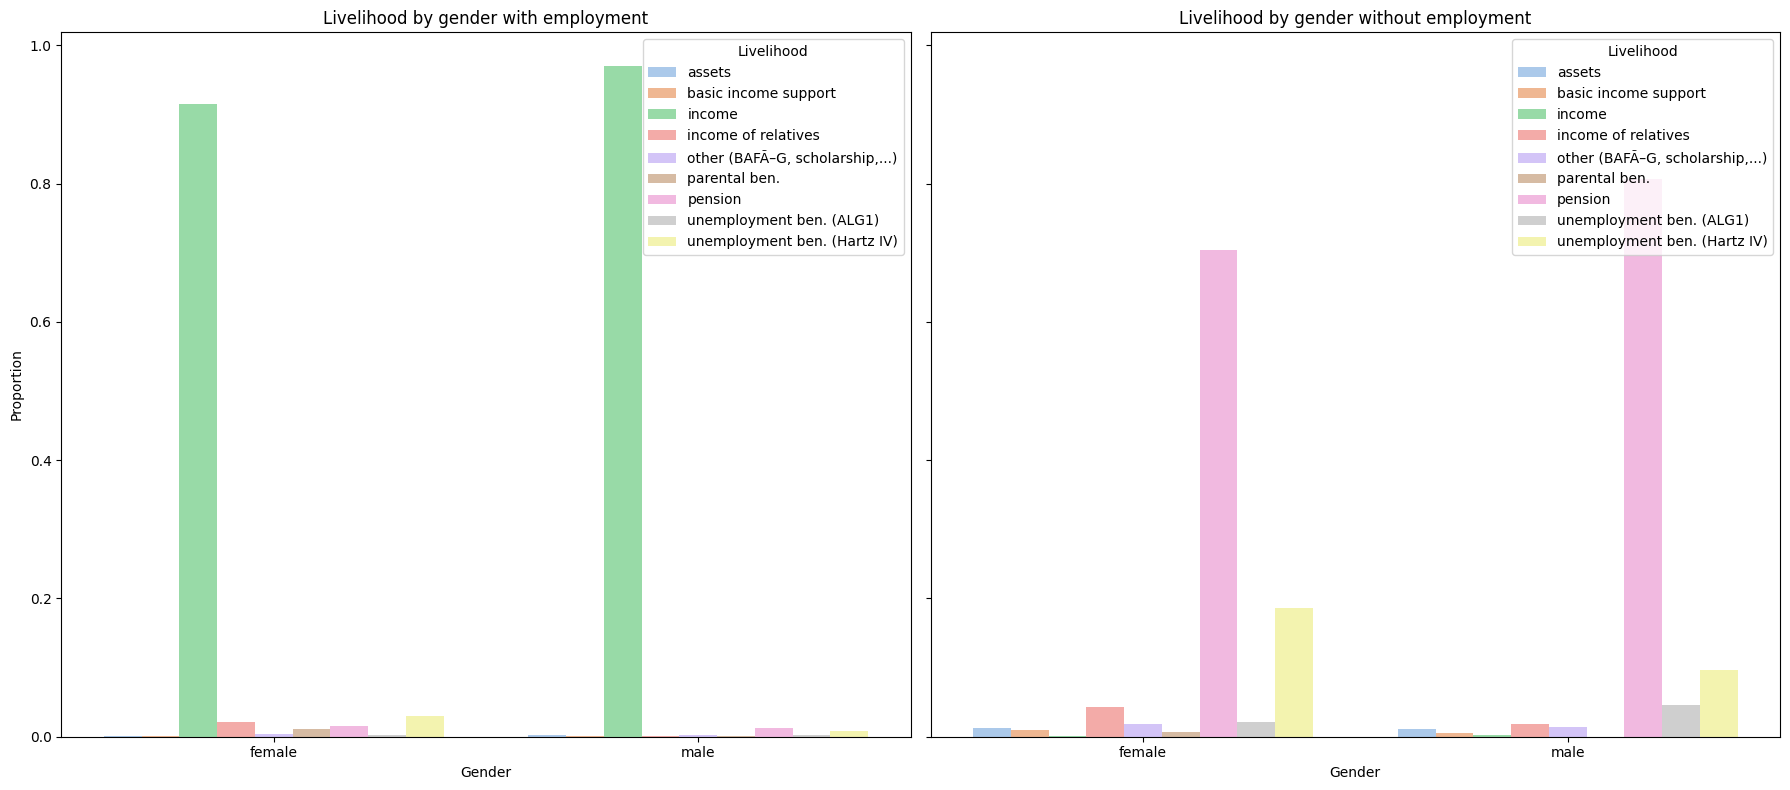

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plot 1: with employment
sns.barplot(
    data=counts,
    x="gender", y="proportion", hue="livelihood",
    palette="pastel", errorbar=None, dodge=True, ax=axes[0]
)
axes[0].set_title("Livelihood by gender with employment")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Proportion")
axes[0].legend(title="Livelihood", loc="upper right")

# Plot 2: without employment
sns.barplot(
    data=counts_no_occupation,
    x="gender", y="proportion", hue="livelihood",
    palette="pastel", errorbar=None, dodge=True, ax=axes[1]
)
axes[1].set_title("Livelihood by gender without employment")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("") 
axes[1].legend(title="Livelihood", loc="upper right")

plt.tight_layout()
plt.show()



In [12]:
# table for People in employment
counts = df_occupation.groupby(["gender","income"]).size().reset_index(name="count")
group_sum = counts.groupby('gender')['count'].transform('sum')
counts['proportion'] = counts['count'] / group_sum

# table for People in unemployment
counts_no_occupation = df_no_occupation.groupby(["gender","income"]).size().reset_index(name="count")
group_sum = counts_no_occupation.groupby('gender')['count'].transform('sum')
counts_no_occupation['proportion'] = counts_no_occupation['count'] / group_sum

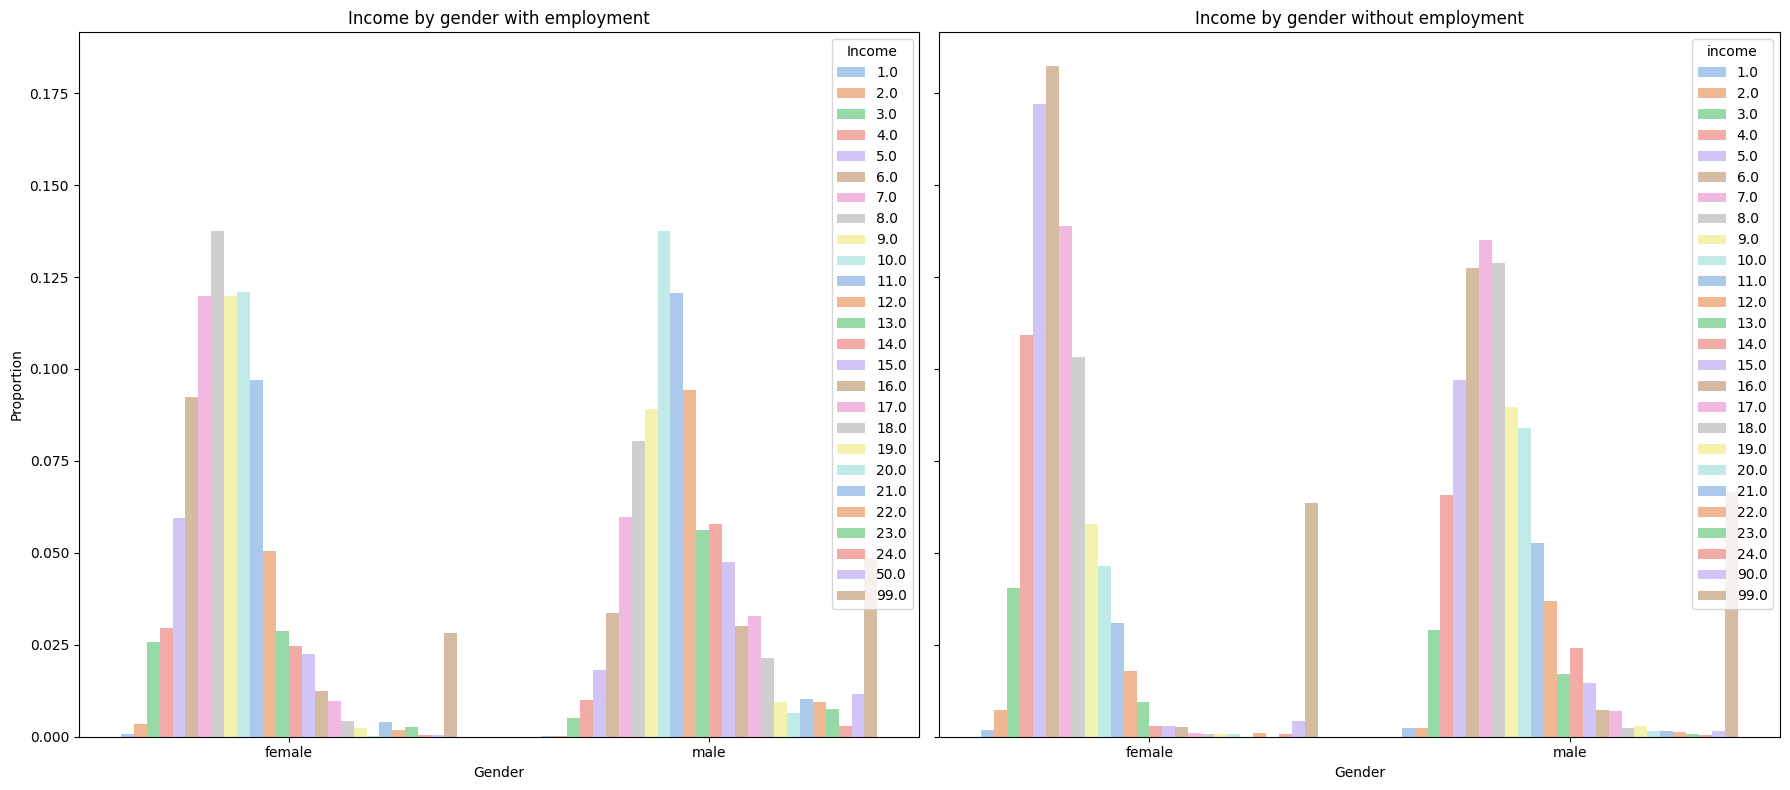

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plot 1: with employment
sns.barplot(
    data=counts,
    x="gender", y="proportion", hue="income",
    palette="pastel", errorbar=None, dodge=True, ax=axes[0]
)
axes[0].set_title("Income by gender with employment")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Proportion")
axes[0].legend(title="Income", loc="upper right")

# Plot 2: without employment
sns.barplot(
    data=counts_no_occupation,
    x="gender", y="proportion", hue="income",
    palette="pastel", errorbar=None, dodge=True, ax=axes[1]
)
axes[1].set_title("Income by gender without employment")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("") 
axes[1].legend(title="income", loc="upper right")

plt.tight_layout()
plt.show()

